# 신용카드 사용자 연체 예측 (0.EDA)

## Library import

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
import math

from sklearn.model_selection import train_test_split

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus = False)

## 데이터 불러오기 & 둘러보기

### Feature 설명
1. index
2. gender: 성별
3. car: 차량 소유 여부
4. realty: 부동산 소유 여부
5. child_num: 자녀 수
6. income_total: 연간 소득
7. income_type: 소득 분류
8. edu_type: 교육 수준
9. family_type: 결혼 여부
10. house_type: 생활 방식
11. DAYS_BIRTH: 출생일 
12. DAYS_EMPLOYED: 업무 시작일
13. FLAG_MOBIL: 핸드폰 소유 여부
14. work_phone: 업무용 전화 소유 여부
15. phone: 전화 소유 여부
16. email: 이메일 소유 여부
17. occyp_type: 직업 유형													
18. family_size: 가족 규모
19. begin_month: 신용카드 발급 월
20. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도

----------------------------------------------------------------------
### Details.

7. income_type: 소득 분류
- 'Commercial associate' : 상업 직장인
- 'Working' : 일반 직장인
- 'State servant' : 공무원
- 'Pensioner' : 연금 수령자
- 'Student' : 학생

8. edu_type: 교육 수준
- 'Higher education' : 대학
- 'Secondary / secondary special' : 고등학교 졸업
- 'Incomplete higher' : 대학 수료하지 못한 자
- 'Lower secondary' : 중학교 졸업
- 'Academic degree' : 학위 수여자

9. family_type: 결혼 여부
- 'Married' : 기혼
- 'Civil marriage' : 법률혼
- 'Separated' : 별거
- 'Single / not married' : 미혼
- 'Widow' : 과부

10. house_type: 생활 방식
- 'Municipal apartment' : 시립 아파트
- 'House / apartment' : 아파트
- 'With parents' : 부모님과 함께 생활
- 'Co-op apartment' : 주택 협동 조합
- 'Rented apartment' :렌트
- 'Office apartment' : 사무실 아파트

11. DAYS_BIRTH: 출생일 
- (데이터 수집 당시 (0)부터 역으로 셈, -1은 데이터 수집일 하루 전에 태어났음을 의미)

12. DAYS_EMPLOYED: 업무 시작일
- (데이터 수집 당시 (0)부터 역으로 셈, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미)
> 양수 값은 고용되지 않은 상태를 의미함

19. begin_month: 신용카드 발급 월
- (데이터 수집 당시 (0)부터 역으로 셈, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미)

20. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
- 낮을 수록 높은 신용의 신용카드 사용자를 의미함



In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(1)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0


In [4]:
df_test.head(1)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [7]:
df_train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [8]:
df_test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

<AxesSubplot:>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


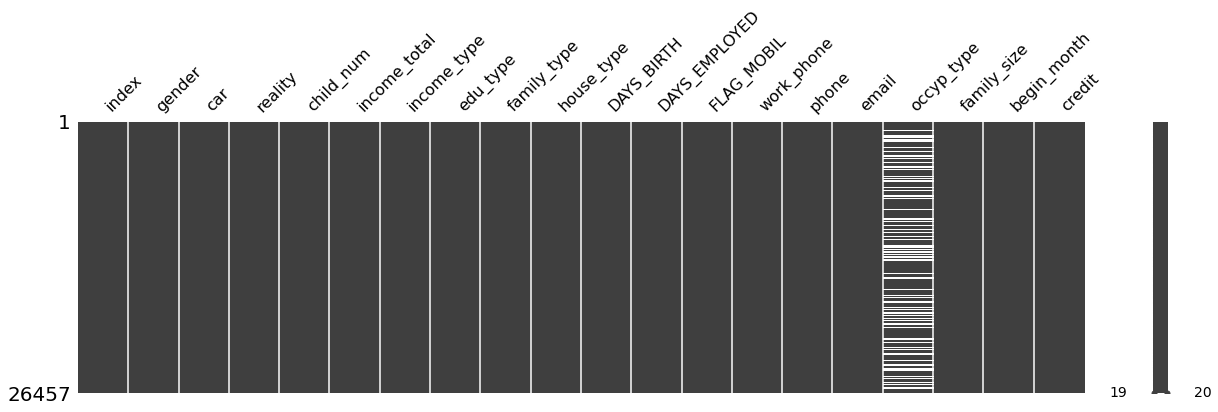

In [9]:
msno.matrix(df_train, figsize=(20,5))

<AxesSubplot:>

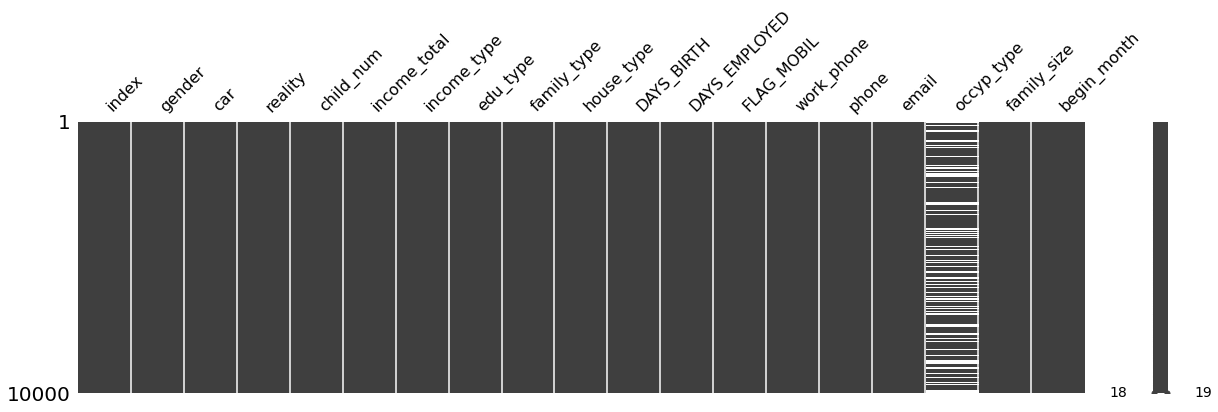

In [10]:
msno.matrix(df_test, figsize=(20,5))

In [11]:
# pd.set_option('display.float_format','{:.2f}'.format)
# df_train.describe()

## 데이터 전처리

In [12]:
train = df_train.copy()
test = df_test.copy()

In [13]:
# 나이, 일한 년도를 새로운 열로 생성
# DAYS_BIRTH : DAYS -> YEAR
train['Age'] = round(abs(train['DAYS_BIRTH'])/365.5,0).astype(np.int32)
test['Age'] = round(abs(train['DAYS_BIRTH'])/365.5,0).astype(np.int32)
# => 30>40>50>20>60대 순서로 많음

# DAYS_EMPLOYED : DAYS -> YEAR
train['worked_year'] = round(abs(train['DAYS_EMPLOYED'])/365.5,0).astype(np.int32)
test['worked_year'] = round(abs(train['DAYS_EMPLOYED'])/365.5,0).astype(np.int32)
# => 일을 시작하지 않은 사람의 수가 많음

In [14]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'Age',
       'worked_year'],
      dtype='object')

## EDA

In [15]:
def pie_binary(target):
    temp = train.groupby(target).count()['index']
    explode = (0.01, 0.01)
    fig = plt.figure(figsize=(4,4))
    plt.pie(temp, explode=explode, labels=temp.index, colors=['yellow', 'orange'],
            autopct='%1.1f%%', pctdistance=0.5, labeldistance=1.1, startangle=90)
    plt.legend(loc='upper right')
    plt.show()
    
    
def box_plot(target):
    fig = plt.figure(figsize=(7,7))
    sns.boxplot(data=train, y='income_total', width=0.2)
    #plt.ylim(0,1600000)
    plt.show()

def show_bar_graph(target):
    sns.countplot(data=train, x=target, hue="credit")

def show_bar_graph_only_one(target):
    sns.countplot(data=train, x=target)
    
def show_stcked_bar_graph(target):
    dataset_list = []
    
    for x in target.unique():
        dataset = train[target== x]['credit'].value_counts()
        dataset_list.append(dataset)
    
    df = pd.DataFrame(dataset_list)
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    
def show_pie_graph(label,target):
    fig = plt.figure(figsize=(20,10))
    
    i=1
    for x in target.unique():
        fig.add_subplot(3, 4, i)
        plt.title(label+':'+str(x))
        train.credit[target == x].value_counts().plot(kind='pie',autopct='%.1f%%', startangle=90)
        i += 1

##### 1. gender

##### 여성 : 66.8% / 남성 : 33.1% (difference = 33.7%)

In [16]:
train['gender'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


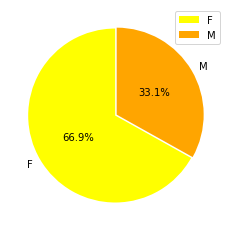

In [17]:
pie_binary('gender')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


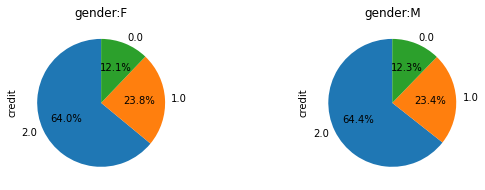

In [18]:
show_pie_graph('gender',train['gender'])

##### 2. car
##### 차가 없는 경우 : 62.0% / 차가 있는 경우 : 38.0% (difference = 24%)

In [19]:
train['car'].value_counts()

N    16410
Y    10047
Name: car, dtype: int64

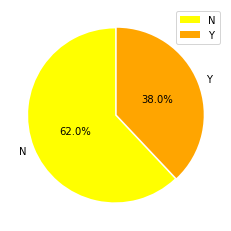

In [20]:
pie_binary('car')

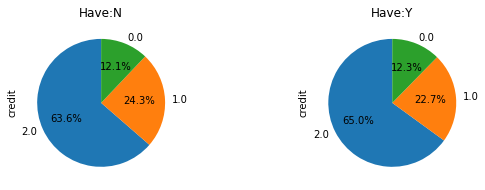

In [21]:
show_pie_graph('Have',train['car'])

##### 3. realty

##### 부동산(집)이 있는 경우 : 67.4% / 부동산(집)이 없는 경우 : 32.6% (difference : 34.8%)

In [22]:
train['reality'].value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

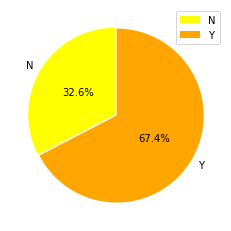

In [23]:
pie_binary('reality')

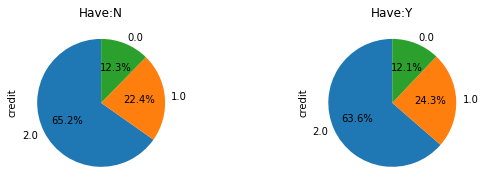

In [24]:
show_pie_graph('Have',train['reality'])

##### 4. child_num


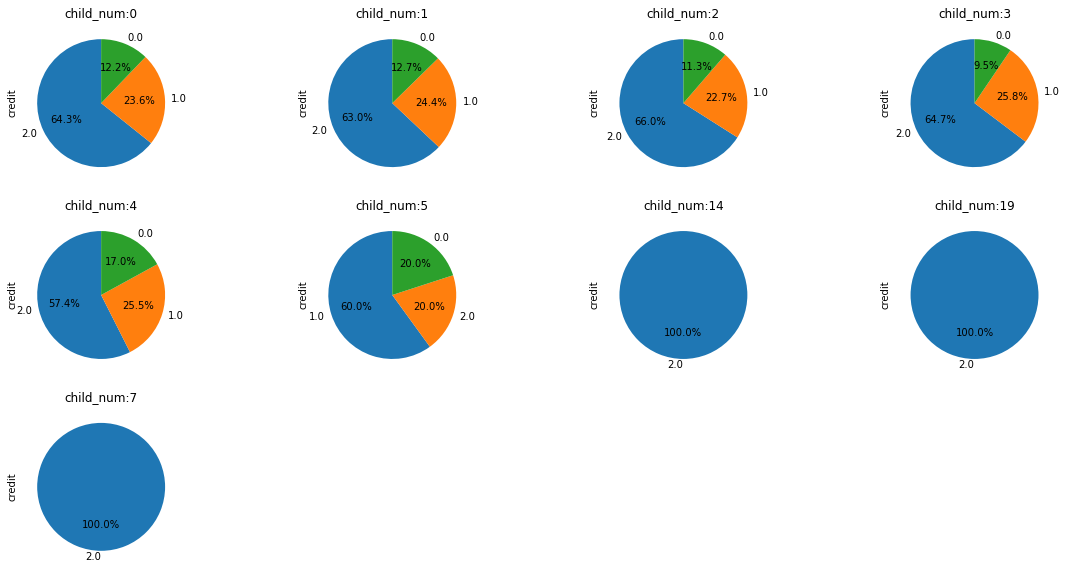

In [25]:
show_pie_graph('child_num', train['child_num'])

In [26]:
train['child_num'].unique()

array([ 0,  1,  2,  3,  4,  5, 14, 19,  7])

In [27]:
train['child_flag'] = train['child_num'].apply(lambda x:0 if x==0 else 1)

In [28]:
train['child_flag'].value_counts()

0    18340
1     8117
Name: child_flag, dtype: int64

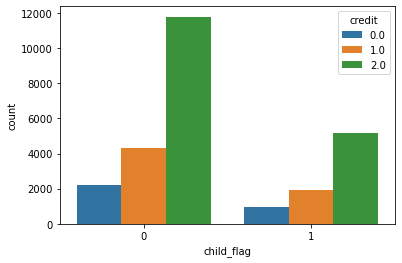

In [29]:
show_bar_graph('child_flag')

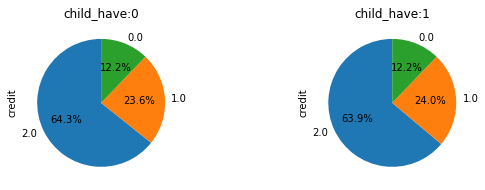

In [30]:
show_pie_graph('child_have', train['child_flag'])

##### 5. income_total

In [31]:
train['income_total'].value_counts()

135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
57150.0        1
51750.0        1
87448.5        1
227250.0       1
191700.0       1
Name: income_total, Length: 249, dtype: int64

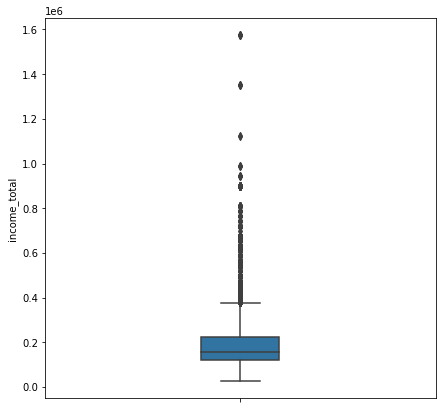

In [32]:
box_plot('income_total')

##### 6. income_type

In [33]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [34]:
df6 = train.groupby('income_type').count()
df6 = df6.sort_values('index')
df6 

,index,gender,car,reality,child_num,income_total,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Age,worked_year,child_flag
income_type,,,,,,,,,,,,,,,,,,,,,
Student,7,7,7,7,7,7,7,7,7,7,...,7,7,7,6,7,7,7,7,7,7
State servant,2154,2154,2154,2154,2154,2154,2154,2154,2154,2154,...,2154,2154,2154,1762,2154,2154,2154,2154,2154,2154
Pensioner,4449,4449,4449,4449,4449,4449,4449,4449,4449,4449,...,4449,4449,4449,9,4449,4449,4449,4449,4449,4449
Commercial associate,6202,6202,6202,6202,6202,6202,6202,6202,6202,6202,...,6202,6202,6202,5176,6202,6202,6202,6202,6202,6202
Working,13645,13645,13645,13645,13645,13645,13645,13645,13645,13645,...,13645,13645,13645,11333,13645,13645,13645,13645,13645,13645


In [35]:
df6.index

Index(['Student', 'State servant', 'Pensioner', 'Commercial associate',
       'Working'],
      dtype='object', name='income_type')

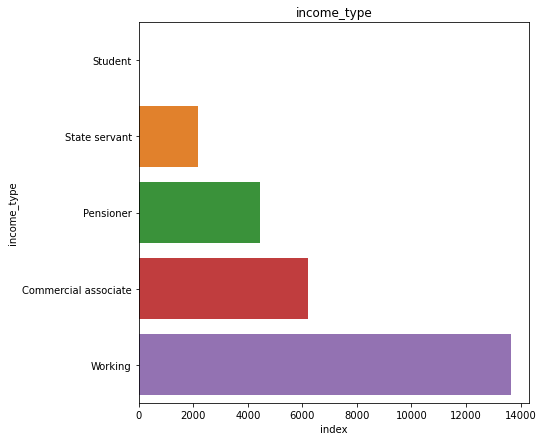

In [36]:
fig = plt.figure(figsize=(7,7))
sns.barplot(data=df6, x=df6['index'], y=df6.index, orient='h')
plt.title('income_type')
plt.show()

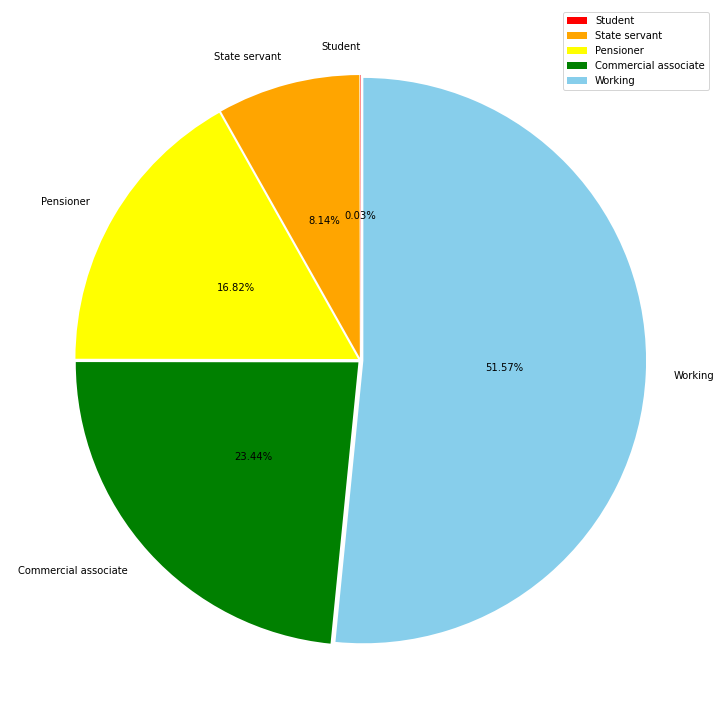

In [37]:
df6_ = df6['index']
explode = (0.01, 0.01, 0.01, 0.01, 0.01)
fig = plt.figure(figsize=(13,13))
plt.pie(df6_, explode=explode, labels=df6_.index, colors = ['red','orange', 'yellow','green','skyblue'], autopct='%1.2f%%', pctdistance=0.5, labeldistance=1.1, startangle=90)
plt.legend(loc='upper right')
plt.show()

In [38]:
# 신용카드를 사용하는 사람의 [직업] 비율
# 직장인(51.5%) -> 상업 직장인..?(23.6%) -> 연금 수령자(16.8%) -> 공무원 -> 학생 순.

#### 7. edu_type

https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education

1. lower secondary education (11~14)
2. upper secondary education (14~18)
- https://en.wikipedia.org/wiki/Secondary_school
3. higher education (=post-secondary education) (대학)
- https://en.wikipedia.org/wiki/Higher_education
-https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4/higher-education
4. incomplete higher (수료증을 받지 못한 자.) <- 이게 틀린 것 같은데..
- https://en.scienceforming.com/10633835-what-does-incomplete-higher-education-mean
5. academic degree (학위를 마친 자) -> higher과 차이가 뭐냐고..
- https://en.wikipedia.org/wiki/Academic_degree

In [39]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [40]:
df7 = train.groupby('edu_type').count()
df7 = df7.sort_values('index')

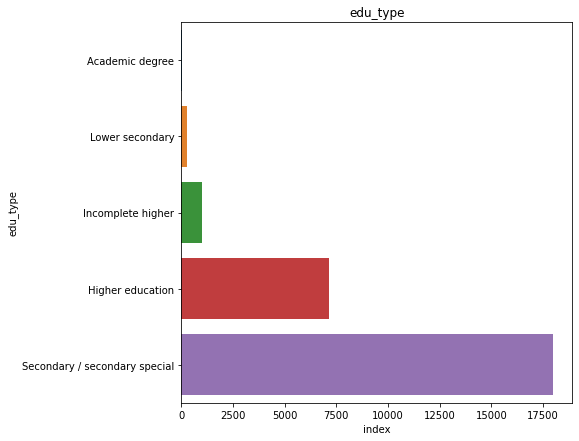

In [41]:
fig = plt.figure(figsize=(7,7))
sns.barplot(data=df7, x=df7['index'], y=df7.index,  orient='h')
plt.title('edu_type')
plt.show()

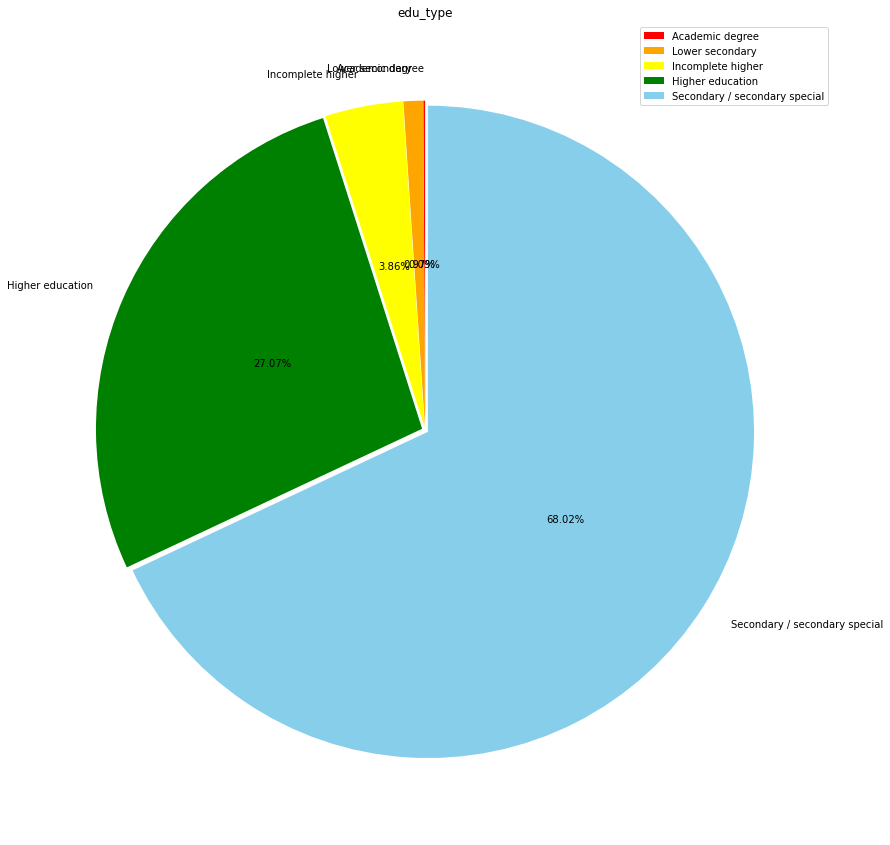

In [42]:
explode = (0.01, 0.01, 0.01, 0.01, 0.01)
fig = plt.figure(figsize=(15,15))
plt.pie(x=df7['index'], explode=explode, labels=df7.index, colors = ['red','orange', 'yellow','green','skyblue'], autopct='%1.2f%%', pctdistance=0.5, labeldistance=1.1, startangle=90)
plt.legend(loc='upper right')
plt.title('edu_type')
plt.show()

In [43]:
# 신용카드를 사용하는 사람의 [교육 수준] 비교
# secondary(68.1%) -> 대학(27%) -> incomplete higher(대학 중퇴) -> 중졸 -> academic

#### 8. family_type

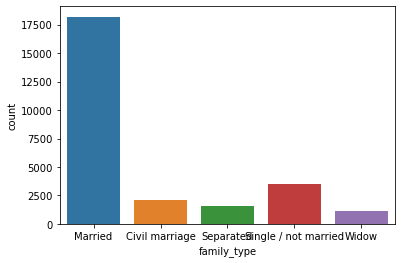

In [44]:
show_bar_graph_only_one('family_type')

In [45]:
train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [46]:
family_type_dict = {'Married': 1,
                 'Single / not married': 2,
                 'Civil marriage': 3,
                 'Separated': 4,
                 'Widow': 5}
train['family_type'] = train['family_type'].map(family_type_dict)

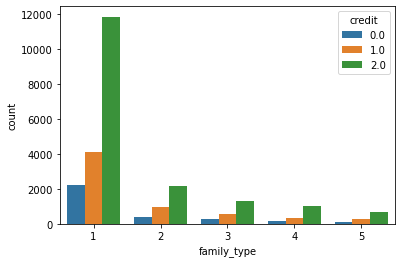

In [47]:
show_bar_graph('family_type')

<AxesSubplot:>

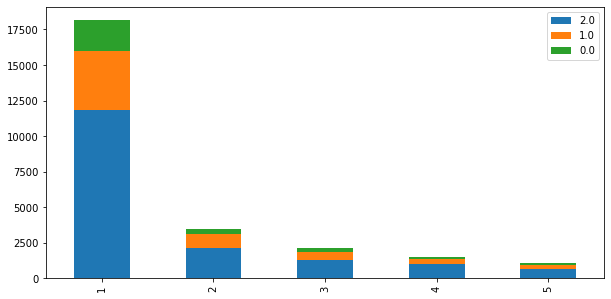

In [48]:
family_type1 = train[train['family_type']==1]['credit'].value_counts()
family_type2 = train[train['family_type']==2]['credit'].value_counts()
family_type3 = train[train['family_type']==3]['credit'].value_counts()
family_type4 = train[train['family_type']==4]['credit'].value_counts()
family_type5 = train[train['family_type']==5]['credit'].value_counts()

df = pd.DataFrame([family_type1, family_type2, family_type3,family_type4,family_type5])
df.index = ['1', '2', '3','4','5']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

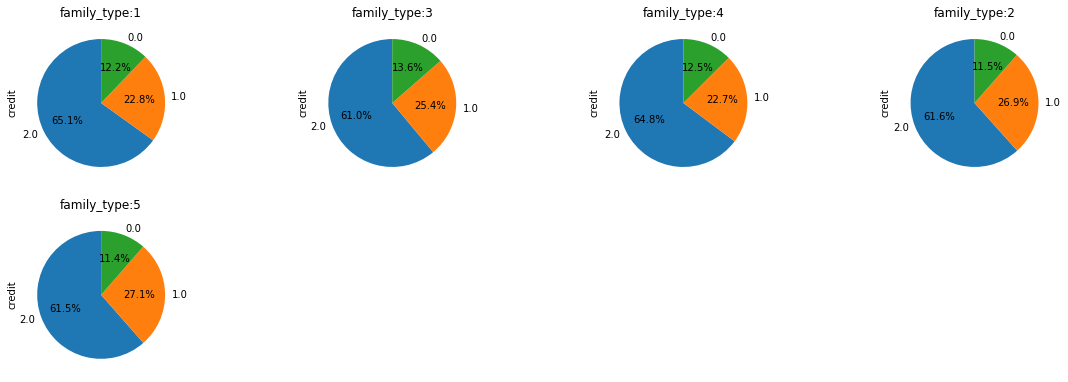

In [49]:
show_pie_graph('family_type',train['family_type'])

#### 9. house_type

In [50]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [51]:
house_type_dict = {'House / apartment': 1,
                 'With parents': 2,
                 'Municipal apartment': 3,
                 'Rented apartment': 4,
                 'Office apartment': 5, 
                 'Co-op apartment': 6}
train['house_type'] = train['house_type'].map(house_type_dict)

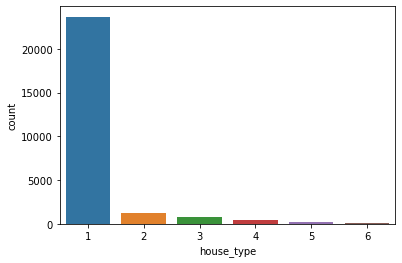

In [52]:
show_bar_graph_only_one('house_type')

<AxesSubplot:>

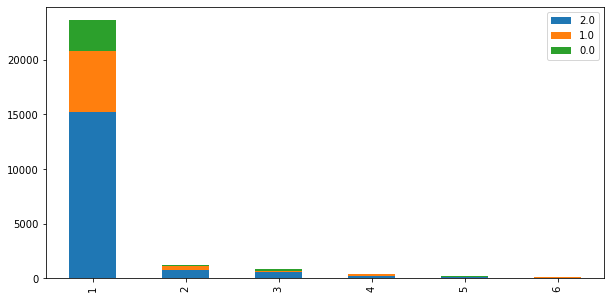

In [53]:
house_type1 = train[train['house_type']==1]['credit'].value_counts()
house_type2 = train[train['house_type']==2]['credit'].value_counts()
house_type3 = train[train['house_type']==3]['credit'].value_counts()
house_type4 = train[train['house_type']==4]['credit'].value_counts()
house_type5 = train[train['house_type']==5]['credit'].value_counts()
house_type6 = train[train['house_type']==6]['credit'].value_counts()

dfx = pd.DataFrame([house_type1, house_type2, house_type3,house_type4,house_type5,house_type6])
dfx.index = ['1', '2', '3','4','5','6']
dfx.plot(kind='bar', stacked=True, figsize=(10, 5))

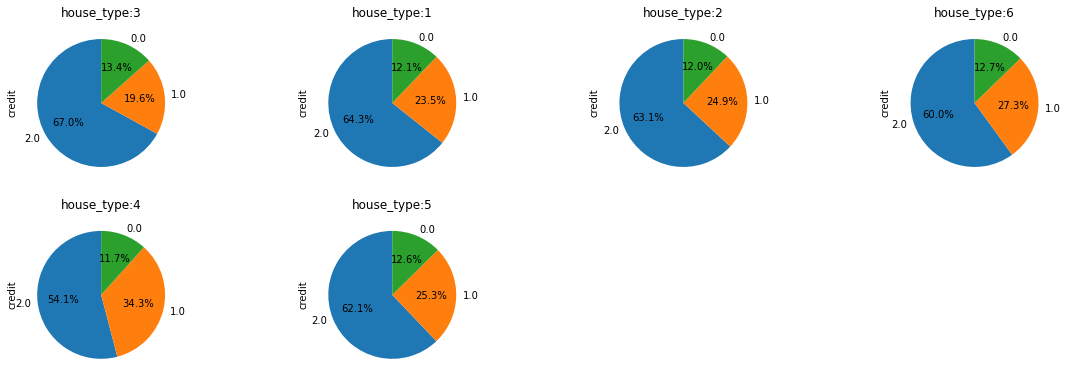

In [54]:
show_pie_graph('house_type',train['house_type'])

##### 10. FLAG_MOBIL

In [55]:
credit_0 = train[train['credit']==0.0]
credit_1 = train[train['credit']==1.0]
credit_2 = train[train['credit']==2.0]

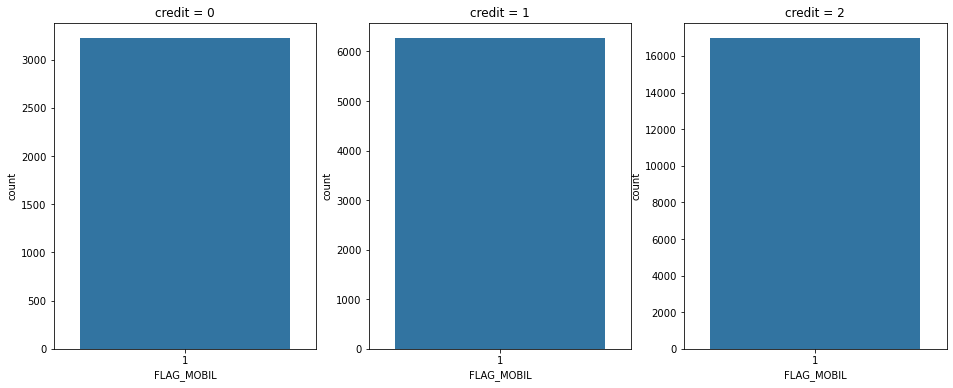

In [56]:
#'FLAG_MOBIL' : 신용 등급에 따른 핸드폰 소지 차이
f, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.countplot(x = 'FLAG_MOBIL',data = credit_0,ax = ax[0],order = credit_0['FLAG_MOBIL'].value_counts().index)
ax[0].set_title('credit = 0')

sns.countplot(x = 'FLAG_MOBIL',data = credit_1,ax = ax[1],order = credit_0['FLAG_MOBIL'].value_counts().index)
ax[1].set_title('credit = 1')

sns.countplot(x = 'FLAG_MOBIL',data = credit_2,ax = ax[2],order = credit_0['FLAG_MOBIL'].value_counts().index)
ax[2].set_title('credit = 2')

plt.show()

##### 11. work_phone 

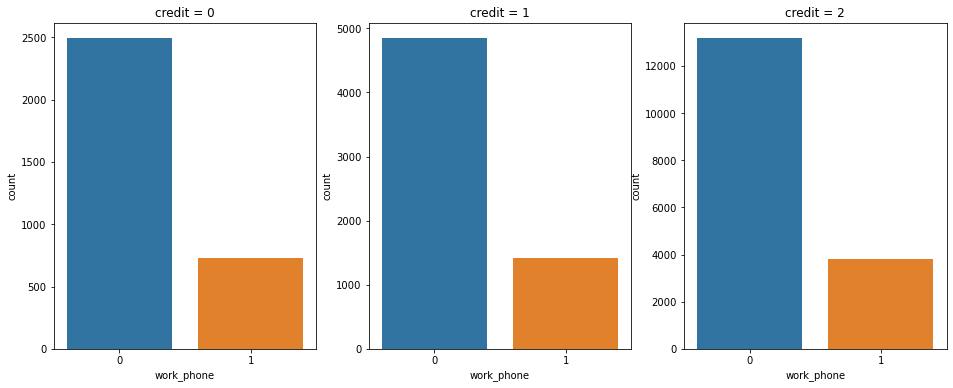

In [57]:
#'work_phone' : 신용 등급에 따른 업무용 전화 소유 여부
# 업무용 전화를 소유하고 있지 않는 사람들이 많음
f, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.countplot(x = 'work_phone',data = credit_0,ax = ax[0],order = credit_0['work_phone'].value_counts().index)
ax[0].set_title('credit = 0')

sns.countplot(x = 'work_phone',data = credit_1,ax = ax[1],order = credit_0['work_phone'].value_counts().index)
ax[1].set_title('credit = 1')

sns.countplot(x = 'work_phone',data = credit_2,ax = ax[2],order = credit_0['work_phone'].value_counts().index)
ax[2].set_title('credit = 2')

plt.show()

##### 12. phone

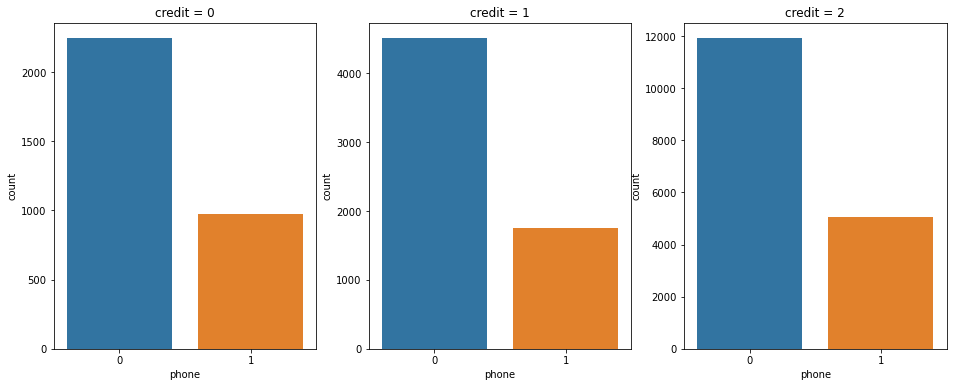

In [58]:
# phone: 신용 등급에 따른 전화 소유 여부
f, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.countplot(x = 'phone',data = credit_0,ax = ax[0],order = credit_0['phone'].value_counts().index)
ax[0].set_title('credit = 0')

sns.countplot(x = 'phone',data = credit_1,ax = ax[1],order = credit_0['phone'].value_counts().index)
ax[1].set_title('credit = 1')

sns.countplot(x = 'phone',data = credit_2,ax = ax[2],order = credit_0['phone'].value_counts().index)
ax[2].set_title('credit = 2')

plt.show()

##### 13. email

In [59]:
train['email'].value_counts()

0    24042
1     2415
Name: email, dtype: int64

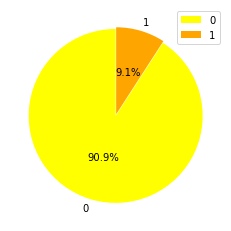

In [60]:
pie_binary('email')

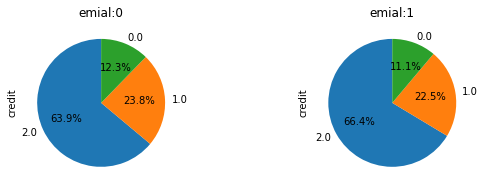

In [61]:
show_pie_graph('emial', train['email'])

##### 15. family_size

In [65]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

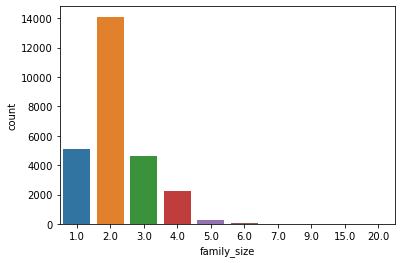

In [66]:
show_bar_graph_only_one('family_size')

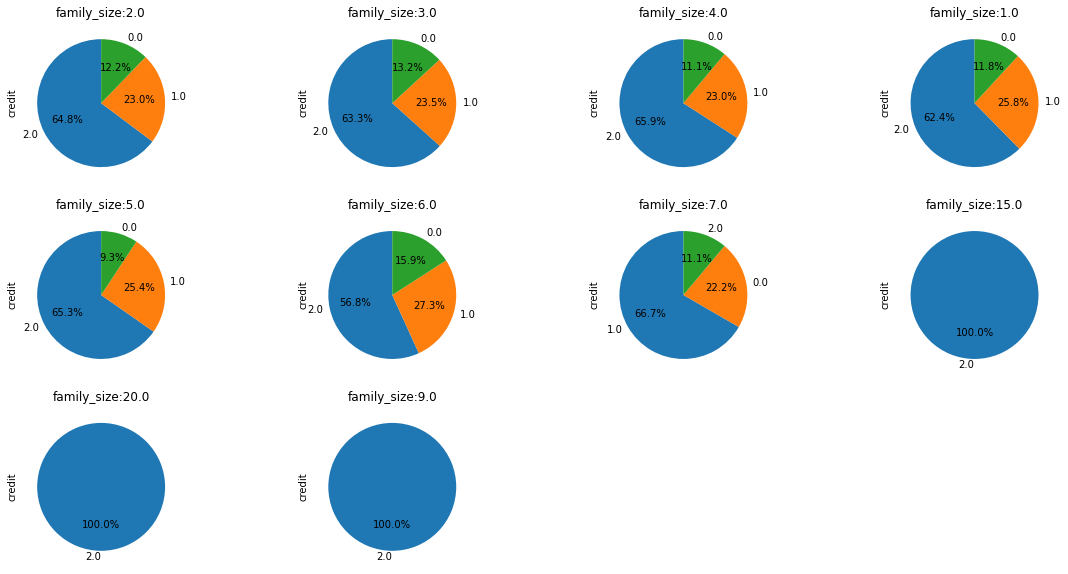

In [67]:
show_pie_graph('family_size',train['family_size'])

In [68]:
train['family_flag'] = train['family_size'].apply(lambda x:0 if x==1 else 1)

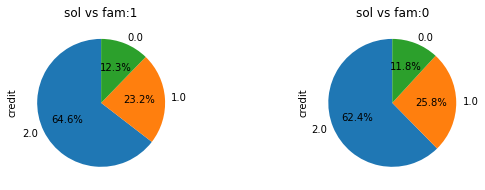

In [69]:
show_pie_graph('sol vs fam', train['family_flag'])

##### 16. begin_month

In [75]:
def minus(x):
    return x * -1
train['begin_month'] = train['begin_month'].apply(minus)

train['begin_month']

0         6.0
1         5.0
2        22.0
3        37.0
4        26.0
         ... 
26452     2.0
26453    47.0
26454    25.0
26455    59.0
26456     9.0
Name: begin_month, Length: 26457, dtype: float64

##### 17. credit

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


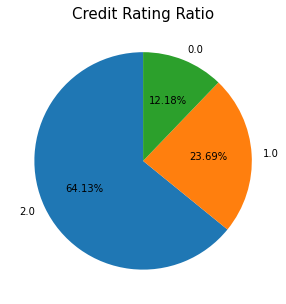

In [73]:
plt.subplots(figsize = (5,5))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%.2f%%", startangle = 90)
plt.title('Credit Rating Ratio', size=15)
plt.show()
# 낮을수록 높은 신용의 신용카드 사용자를 의미한다. 따라서 낮은 신용의 신용카드 사용자가 많다는 것을 알 수 있다.